In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import combinations
import math

In [7]:
K = 3
# columns = ['instrumentalness', 'liveness']
# df = pd.read_csv('./dataset/spotify.csv')[columns]
columns = ['Height', 'Weight']
df = pd.read_csv('./dataset/height-weight-sex-train.csv')[columns]
dataset = df.to_numpy()
dataset.shape

(499, 2)

In [8]:
def get_single_link(cluster1, cluster2):
    N1, D = cluster1.shape
    N2, D = cluster2.shape
    operand1 = np.tile(cluster1, reps=N2).reshape(N1, N2, D)
    operand2 = np.expand_dims(cluster2, axis=0)
    return math.sqrt(((operand1 - operand2) ** 2).sum(axis=2).min())


def get_average_link(cluster1, cluster2):
    N1, D = cluster1.shape
    N2, D = cluster2.shape
    operand1 = np.tile(cluster1, reps=N2).reshape(N1, N2, D)
    operand2 = np.expand_dims(cluster2, axis=0)
    return math.sqrt(((operand1 - operand2) ** 2).sum(axis=2).mean())


def get_next_clusters(clusters):
    """
    Time complexity: O(N*(N-1)/2)
    Distances:       average method
    """
    N = len(clusters)
    min_m, min_n = 0, 0
    min_dist = float('inf')
    for m, n in combinations(range(N), 2):
        dist = get_average_link(clusters[m], clusters[n])
        if dist < min_dist:
            min_dist = dist
            min_m = m
            min_n = n
    next_clusters = [clstr for i, clstr in enumerate(clusters)
                     if i != min_m and i != min_n]
    clstr1 = clusters[min_m]
    clstr2 = clusters[min_n]
    next_clusters.append(np.concatenate([clstr1, clstr2]))
    return next_clusters

In [9]:
iters = len(dataset)
clusters = np.expand_dims(dataset, axis=1)
for _ in tqdm(range(len(dataset), K, -1)):
    clusters = get_next_clusters(clusters)

  0%|          | 0/496 [00:00<?, ?it/s]

100%|██████████| 496/496 [02:34<00:00,  3.22it/s]


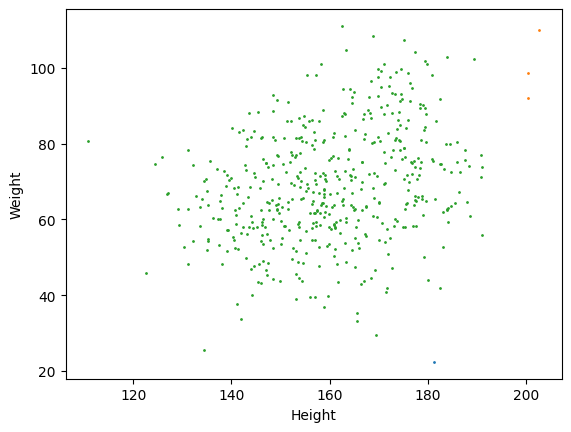

In [10]:
for c in clusters:
    plt.scatter(c.T[0], c.T[1], s=1)
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()